## Final Project (Project 6)
## Programming with Python
## Regan Alt 
## 12/15/2020

### Problem 1: Analyze and draw insight/conclusions from the dataset births.csv

#### 1.1 Read births.csv and creata a data frame with appropriate name

In [74]:
# import pandas and matplotlib.pyplot modules   and assign an ALIAS to the library name
# make all the charts appear inline in the notebook and not in a popup window.import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.precision',2)
%matplotlib inline
# palette options: "colorblind", 'Set1', "Set2", "Set3", "summer", "spring", "pastel", "rainbow"
sns.set(palette = "rainbow")

In [75]:
#assign births.csv appropriate dataframe name as "births"
# read the births.csv file and display the contents
births = pd.read_csv("births.csv")
#births = pd.read_csv("births.csv", index_col="Date")
births

,birth_year,gender,ethnicity,first_name,frequency
0,2011,female,hispanic,geraldine,13
1,2011,female,hispanic,gia,21
2,2011,female,hispanic,gianna,49
3,2011,female,hispanic,giselle,38
4,2011,female,hispanic,grace,36
...,...,...,...,...,...
19413,2016,female,hispanic,alayna,10
19414,2015,female,hispanic,yaritza,12
19415,2015,male,white non hispanic,mendel,42
19416,2016,male,asian and pacific islander,isaac,21


#### Due Diligence on Births data

In [76]:
# how many rows and columns in births ?
births.shape

(19418, 5)

In [77]:
# total number of cells in the data frame = #columns * #rows
births.size

97090

In [78]:
# what are the column names?
births.columns

Index(['birth_year', 'gender', 'ethnicity', 'first_name', 'frequency'], dtype='object')

In [79]:
# what is the index of the dataframe?
births.index

RangeIndex(start=0, stop=19418, step=1)

In [80]:
#what are the data types of each column? String, integer, floating point number? births.dtypes
births.dtypes

birth_year     int64
gender        object
ethnicity     object
first_name    object
frequency      int64
dtype: object

In [81]:
# what is the data type of births?
type(births)

pandas.core.frame.DataFrame

#### Are there any misisng values or blank values? 

In [82]:
# calc percentage of data that is missing in this series
print("Number of missing values in births dataset:","\n",births.isnull().sum() * 100 / len(births))

Number of missing values in births dataset: 
 birth_year    0.0
gender        0.0
ethnicity     0.0
first_name    0.0
frequency     0.0
dtype: float64


In [83]:
# Check for missing values - would say "True" if there are
births.isna()

,birth_year,gender,ethnicity,first_name,frequency
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
19413,False,False,False,False,False
19414,False,False,False,False,False
19415,False,False,False,False,False
19416,False,False,False,False,False


In [84]:
#another way to ensure there are no values which are blank or null by summing them:
births.isna().sum()

birth_year    0
gender        0
ethnicity     0
first_name    0
frequency     0
dtype: int64

**Conclusion** Based on the findings above, one can conlude there are no blank or null values in the births dataset

### 1.2 Total number of babies reported in the dataset

In [85]:
#count the total number of births for each column 
births.count()

birth_year    19418
gender        19418
ethnicity     19418
first_name    19418
frequency     19418
dtype: int64

In [86]:
#shape the data to get the total
births.shape[0]

19418

**Conclusion** There are a total of 19,418 babies reportedley born in NYC based on this "births" dataset.

### 1.3 Of the babies reported born in the previous question, how many are male, how many are female?
Display an appropriate chart/graph as well

In [87]:
#count the value of "gender" to find how many babies were born as male or female
births.gender.value_counts()

female    9933
male      9485
Name: gender, dtype: int64

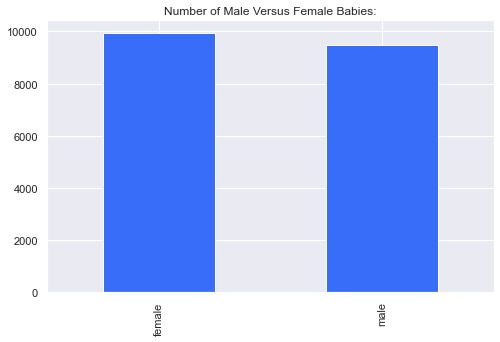

In [88]:
#display the number of babies born in each gender in a bar chart
births.gender.value_counts().plot(figsize = (8,5), kind = 'bar', title ="Number of Male Versus Female Babies:")

**Conclusion** Based on the analysis, there is almost an equivalent amount of male and female babies born in this dataset. There were 9,485 male babies born and 9,933 female babies born

### 1.4 What is the number of babies reported born in each year (ignoring gender, ethnicity)? 
Show as a table as well as a visual (chart).

In [89]:
#count the value of birth_year to find how many babies were born in that year
births.birth_year.value_counts()

2011    3900
2012    3855
2014    3790
2013    3765
2016    2063
2015    2045
Name: birth_year, dtype: int64

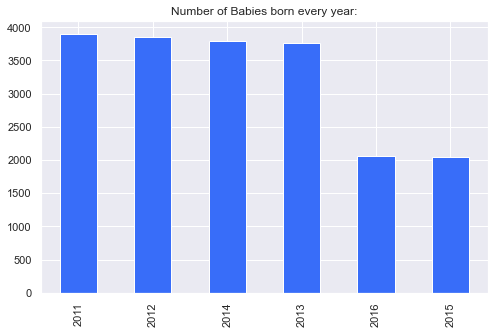

In [90]:
#display the number of babies born each year in a bar chart
births.birth_year.value_counts().plot(figsize = (8,5), kind = 'bar', title ="Number of Babies born every year:")

**Conclusion** Based on the above analysis, birth rates in NYC declined by almost half between 2011 - 2015. For instance, in 2011 there were 3,900 born versus in 2015 there were 2,045 babies born. 

### 1.5 How many babies born in the year 2013 were given the name emma?

In [91]:
#count the data to find how many first_names = "emma"
births.loc[(births.birth_year == 2013) & (births.first_name == "emma")].shape[0]

6

**Conclusion** In 2013, there were 6 babies named "Emma" in the NYC area.

### 1.6 Table and chart to show the number of babies born of each ethnicity, ignoring year and gender

In [92]:
# Summarize the column  ethnicity, containing name of the team for each player:  
births.ethnicity.describe()

count        19418
unique           7
top       hispanic
freq          5714
Name: ethnicity, dtype: object

In [93]:
# Calculate the number of ethnicities for the given births.  
births.ethnicity.value_counts()

hispanic                      5714
white non hispanic            5473
black non hispanic            2826
asian and pacific islander    2693
white non hisp                1338
asian and paci                 693
black non hisp                 681
Name: ethnicity, dtype: int64

In [94]:
# Table displaying number of ethnicities for the given births
#births.ethnicity.read_table()
!pip install sidetable

import pandas as pd
import sidetable

births.stb.freq(['ethnicity'])

,ethnicity,count,percent,cumulative_count,cumulative_percent
0,hispanic,5714,29.43,5714,29.43
1,white non hispanic,5473,28.19,11187,57.61
2,black non hispanic,2826,14.55,14013,72.17
3,asian and pacific islander,2693,13.87,16706,86.03
4,white non hisp,1338,6.89,18044,92.92
5,asian and paci,693,3.57,18737,96.49
6,black non hisp,681,3.51,19418,100.00


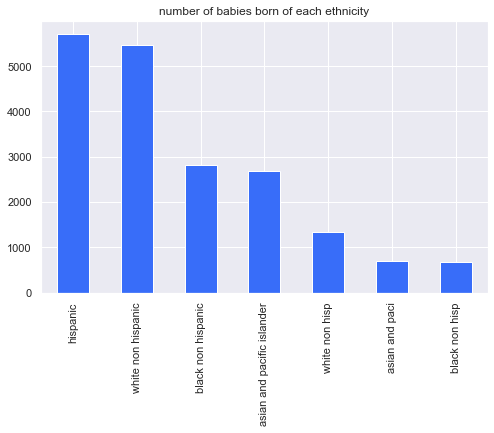

In [95]:
## Chart showing number of babies born of each ethnicity 
# number of ethnicities in the DataFrame for babies - summarized visually
births.ethnicity.value_counts().plot(figsize = (8,5),kind="bar",
                                 title ="number of babies born of each ethnicity")

**Conclusion** Based on the births data, hispanic babies born in NYC had the highest frequency, and black non-Hispanic babies were born the least frequently. 

### 1.7 What are the ten most popular names in the dataset 

In [96]:
#count the values in the dataset to find the ten most popular first_names
births.first_name.value_counts(ascending = False).head(10)

avery      56
riley      53
ariel      51
dylan      48
jordan     46
ryan       42
logan      41
caleb      40
kevin      40
gabriel    39
Name: first_name, dtype: int64

**Conclusion** In the dataset, the most popular names were "Avery", "Riley", and "Ariel"

### 1.8 What are the ten most popular female baby names in the dataset 

In [97]:
#analyze the dataset to find the ten most popular female baby names
births[births.gender == "female"].first_name.value_counts(ascending = False).head(10)

grace       39
maya        38
michelle    38
hannah      38
kayla       38
arianna     38
alyssa      38
ariana      38
ashley      38
chloe       37
Name: first_name, dtype: int64

**Conclusion** Based on the births data, the top three most popular female names were "Grace", "Maya", and "Michelle". 

### 1.9 Total number of distinct first names in the dataset

In [98]:
# Number of unique values in the births.first_name column?  
births.first_name.nunique()

1775

**Conclusion** Based on the data, there was a total of 1775 distinct first names in NYC in this period of time.

### 1.10 Number of Distinct Male and Female baby names 

In [99]:
#births.first_name(['gender'='female])'.value_counts()
births.groupby(['gender']).first_name.nunique()

gender
female    974
male      830
Name: first_name, dtype: int64

**Conclusion** From the analysis, there are 974 unique female and 830 unique male names in the dataset from NYC. 

### 1.11 Are 1.9 and 1.10 consistent?

**Conclusion** 1.9 says there are 1775 unique names while 1.10 says there are 974 + 830 = 1804 unqiue names. This may come from the fact that there are  names that are used for males and females as well. In question 1.10, one can assume these unisex names were counted twice. Based on this observation, there should be 29 names that are considered unisex, or used for both genders.

### 1.12 Create a table (dataframe) to show the total number of babies of each ethnicity born in each year.
Show subtotals by ethnicity as well as year.

In [100]:
#print table to show number of babies for each ethnicity/year
pd.crosstab(births.birth_year, births.ethnicity, margins = True)

ethnicity,asian and paci,asian and pacific islander,black non hisp,black non hispanic,hispanic,white non hisp,white non hispanic,All
birth_year,,,,,,,,
2011,0,612,0,762,1228,0,1298,3900
2012,693,0,681,0,1143,1338,0,3855
2013,0,646,0,680,1108,0,1331,3765
2014,0,684,0,673,1071,0,1362,3790
2015,0,374,0,366,573,0,732,2045
2016,0,377,0,345,591,0,750,2063
All,693,2693,681,2826,5714,1338,5473,19418


**Conclusion** In the year 2012 there seems to be a category where the ethnicity labeled as 'asian and paci', differentiates from the rest of the years where this ethnicity is labeld as: 'asian and pacific islander'. For this reason, data for the shortened label only appears during 2012, and for the rest of the years it returns to 'asian and pacific islander'. This may skew the analysis if one was evaulating data for only 2012, or specifically babies born of asian and pacific islander heritage. 

### 1.13 Some sociologists have expressed concern that the number of female babies born in NYC is less than the number of male babies born year after year. 
A table (report) which can be used to support the above claim or refute it. 

In [101]:
# number of babies by year (row) and gender (column)
data113 = pd.crosstab(births.birth_year, births.gender)
data113["diff"] = data113.female - data113.male
data113

gender,female,male,diff
birth_year,,,
2011,1997,1903,94
2012,1977,1878,99
2013,1910,1855,55
2014,1958,1832,126
2015,1044,1001,43
2016,1047,1016,31


**Conclusion** After looking at the report printed above, one can see that year after year there are more female than male babies born in the NYC metropolitain area. Addiitonally, both genders are gradually born less over the years, from 2011 - 2016. 

### 2.1  Prices of Houses Dataset (read and inspected)

In [102]:
#assign house_prices.xlsx to appropriate dataframe name as "house"
# read the house_prices.xlsx file and display the contents
house = pd.read_excel("house_prices.xlsx", parse_dates = True)
house.head()

,address,price,acres,size_sqft,age,rooms,baths,garages
0,9 Sycamore Road,466.0,0.23,2448,46,7,3.5,2
1,21 Jefferson St,364.0,0.22,1942,51,7,2.5,1
2,38 Hitching Post Lane,429.0,0.16,2073,29,5,3.0,2
3,4 Poppy Lane,548.4,0.46,2707,18,8,2.5,1
4,5 Daniel Drive,405.9,0.25,2042,46,7,1.5,1


#### Due Diligence on House Prices data 

In [103]:
# how many rows and columns in house
house.shape

(30, 8)

In [104]:
# total number of cells in the data frame = #columns * #rows
house.size

240

In [105]:
# what are the column names
house.columns

Index(['address', 'price', 'acres', 'size_sqft', 'age', 'rooms', 'baths',
       'garages'],
      dtype='object')

In [106]:
# what is the index of the dataframe
house.index

RangeIndex(start=0, stop=30, step=1)

In [107]:
#what are the data types of each column? String, integer, floating point number
house.dtypes

address       object
price        float64
acres        float64
size_sqft      int64
age            int64
rooms          int64
baths        float64
garages        int64
dtype: object

In [108]:
# what is the data type of house prices?
type(house)

pandas.core.frame.DataFrame

### 2.2 Summarize house prices in the community. Add an appropriate chart.

In [109]:
#statistcally summarize the house prices dataset (count, mean, max etc)
house.price.describe()

count     30.00
mean     389.85
std      120.39
min      217.70
25%      314.33
50%      363.75
75%      438.52
max      749.74
Name: price, dtype: float64

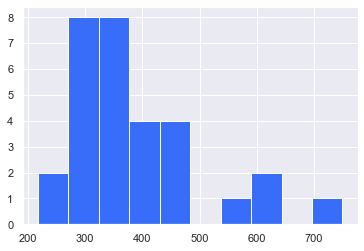

In [110]:
#display the house prices dataset as a histogram
house.price.hist()

**Conclusion** The histogram aboves portrays the distribtion of the house prices in the community. The max price for a home in this community can be seen as an outlier on the far right (greater than 700 thousand dollars), whereas the majority of houses are between $300- 450 thousand. 

### 2.3 How many houses are there with 1 bath, 2 baths, 3 baths etc.? show a visual as well

In [111]:
#count the value of "baths" to find how many houses have 1, 2, or 3 baths
house.baths.value_counts()

2.0    12
1.0     7
2.5     6
3.0     3
1.5     1
3.5     1
Name: baths, dtype: int64

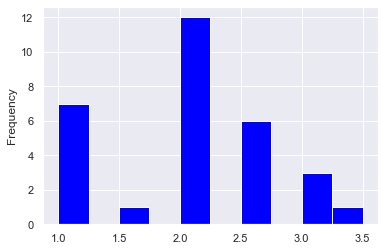

In [112]:
#display the results of number of baths/house in a histogram
house.baths.plot(kind="hist", color = "blue");

**Conclusion** The histogram aboves portrays the distribution of number of baths per house. The majority of houses have 2 full bathrooms, whereas the least amount of houses have 1.5 and 3.5 baths. The second highest amount of baths is 1 full bath.

### 2.4  Create a heatmap to explore the relation between price and the other attributes of the house.
Write down your observations.

In [113]:
# find pair_wise correlations. Ignores the non-numeric columns
house_corr = house.corr()
house_corr

,price,acres,size_sqft,age,rooms,baths,garages
price,1.00,0.61,0.83,-5.67e-01,3.48e-01,0.50,0.61
acres,0.61,1.00,0.42,-2.03e-01,6.62e-02,0.09,0.27
size_sqft,0.83,0.42,1.00,-4.10e-01,4.00e-01,0.52,0.57
age,-0.57,-0.20,-0.41,1.00e+00,-8.59e-03,-0.51,-0.53
rooms,0.35,0.07,0.40,-8.59e-03,1.00e+00,0.13,0.03
baths,0.50,0.09,0.52,-5.11e-01,1.33e-01,1.00,0.49
garages,0.61,0.27,0.57,-5.32e-01,2.88e-02,0.49,1.00


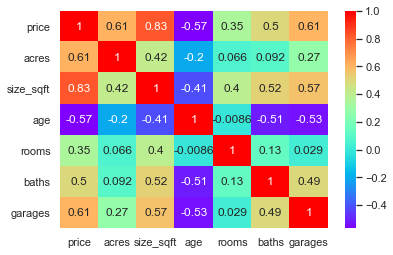

In [114]:
# print the price vs other attributes heatmap
sns.heatmap(data=house_corr , annot = True, cmap = 'rainbow' )

**Conclusion** based on the correlations in the data, and visualized in the heatmap, the square feet and price of a house is the most correlated, whereas number of rooms and age of a house is the least correlated. 

### 2.5 Using Seasborn - analyze the relationship between (1) price and property size, (2) price and living space, (3) price and age. 

### (1) correlation between price and property size (acres)

In [115]:
# correlation between house price and property size  
house.price.corr(house.acres)

0.6139631731178177

### (2) correlation between price and living space (square feet)

In [116]:
# correlation between house price and living space
house.price.corr(house.size_sqft)

0.8281926114902161

### (3) correlation between price and age

In [117]:
# correlation between house price and age
house.price.corr(house.age)

-0.5670392615793899

**Conclusions** Based on the correlations analyzed above, Age has a negative correlation, and is thus the most least correlated with how a home is priced on the market. On the other hand, variables such as square feet and living space is quite highly correlated with the price of a home listing, 

### 2.6 based on the analysis above, which variable has the strongest relationship (influence) on price? 

**Conclusions** Based on the previous analysis, the attribute "square feet" of a home has the strongest influence on how a house is listed by price on the market. 

### 2.7 Explore the relationship between the number of bathrooms and living space (size_sqft).

In [118]:
#correlation between square feet and number of bathrooms in a home
house.size_sqft.corr(house.baths)

0.5213143659171942

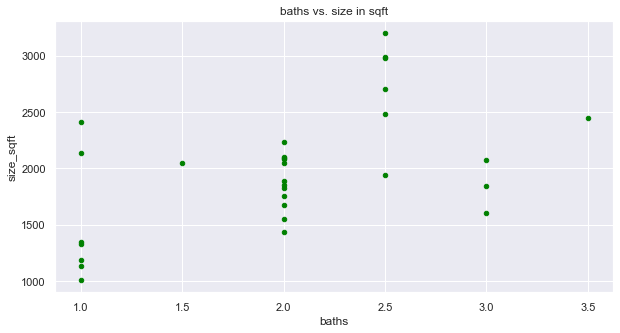

In [119]:
house.plot(x="baths", y="size_sqft", kind="scatter", color= 'green', figsize = (10,5),title="baths vs. size in sqft")

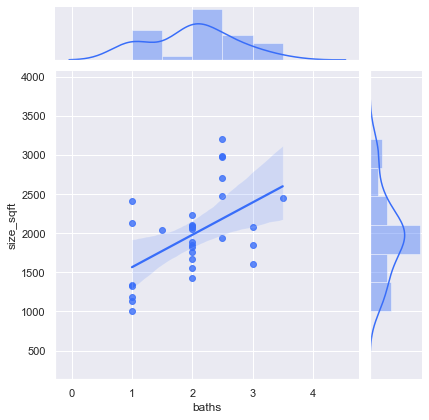

In [120]:
sns.jointplot(data= house, x = 'baths', y = 'size_sqft' ,kind= 'reg');

**Conclusions** Based on the correlation between the square footage of a living space, or home, and the number of bathrooms inside that home, the more bathrooms there are indicates a higher square footage in the home. Additionally, the homes with the highest square footage (above 3,000 sqft), are most likely to have 2.5 bathrooms. 

### 2.8 Date Stamp

In [121]:
#print the time the last cell was executed
import datetime
import getpass
print('/n', 'Finished execution at', datetime.datetime.now())
print(getpass.getuser())

/n Finished execution at 2020-12-15 20:07:21.160756
altre
